# Trajectories of an Autonomous System

## 1. Problem Overview
In this experiment, we investigate the autonomous ODE:
$$\dot{x} = \sin(x)$$

An autonomous system is a system where the derivative does not explicitly depend on time. The motion of the system is determined entirely by its current position $x$. 

### Objectives:
* Use **Euler's Method** to integrate the ODE numerically.
* Observe trajectories starting from four initial conditions: $x(0) = 1, -1, 2, -2$.
* Analyze the **asymptotic behavior** as $t \to \infty$ and identify stable/unstable fixed points.

## 2. Mathematical Analysis

### Fixed Points
Fixed points (equilibria) occur when the rate of change is zero:
$$\dot{x} = f(x) = 0$$
$$\sin(x) = 0 \implies x^* = n\pi \quad \text{for } n = 0, \pm 1, \pm 2, \dots$$

### Stability Analysis
To determine the stability, we examine the derivative of the flow function $f'(x) = \cos(x)$ at the fixed points:
* **Unstable Point ($x^* = 0$):** $f'(0) = \cos(0) = 1 > 0$. Since the derivative is positive, any small perturbation away from 0 will grow. This is a **repelling fixed point**.
* **Stable Points ($x^* = \pm \pi$):** $f'(\pm \pi) = \cos(\pm \pi) = -1 < 0$. Since the derivative is negative, the system will return to these points if nudged. These are **attractive fixed point**.

### Asymptotic Behavior
The trajectories are bounded by these fixed points. 
* For $x \in (0, \pi)$, $\dot{x} > 0$, so the solution increases toward $\pi$.
* For $x \in (-\pi, 0)$, $\dot{x} < 0$, so the solution decreases toward $-\pi$.
As $t \to \infty$, all trajectories starting within $(-\pi, \pi)$ (except exactly at 0) will settle at either $\pi$ or $-\pi$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(x):
    return np.sin(x)

dt = 0.01
t_max = 10
t = np.arange(0,t_max,dt)
initial_conditions = [1,-1,2,-2]

### Plotting f(x) vs x 
In an autonomous system $\dot{x} = f(x)$,
* **Intercepts ($f(x)=0$)**: These are the fixed points.
* **Positive Region ($f(x)>0$)**: The "flow" is to the right ($\to$).
* **Negative Region ($f(x)<0$)**: The "flow" is to the left ($\gets$).
* **Stability**: If the flow points toward the fixed point from both sides, it is stable (filled circle). If it points away, it is unstable/repellant (empty circle)

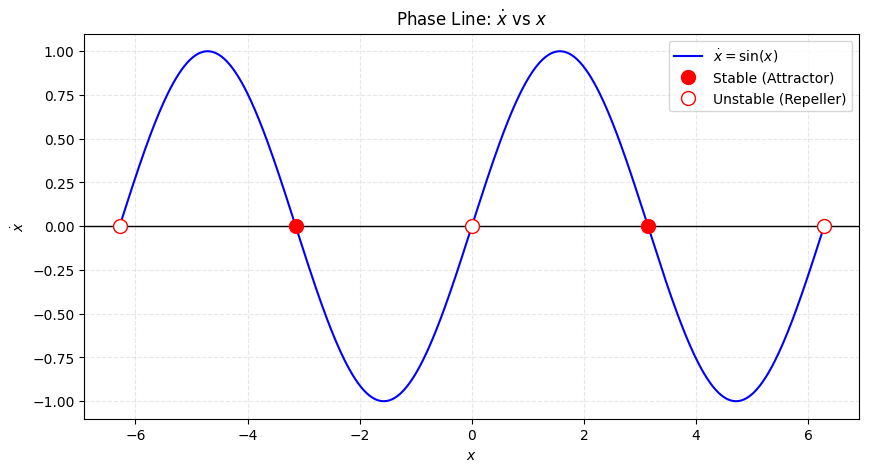

In [ ]:
x = np.linspace(-2 * np.pi, 2 * np.pi, 500)
stable = [-np.pi, np.pi]
unstable = [-2*np.pi, 0, 2*np.pi]

plt.figure(figsize=(10, 5))

plt.plot(x, np.sin(x), 'b-', label=r'$\dot{x} = \sin(x)$')
plt.axhline(0, color='black', lw=1)

# ms=markersize, mfc=markerfacecolor
plt.plot(stable, np.zeros_like(stable), 'ro', ms=10, label='Stable (Attractor)')
plt.plot(unstable, np.zeros_like(unstable), 'ro', ms=10, mfc='w', label='Unstable (Repeller)')

plt.title(r'Phase Line: $\dot{x}$ vs $x$')
plt.xlabel('$x$')
plt.ylabel(r'$\dot{x}$')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

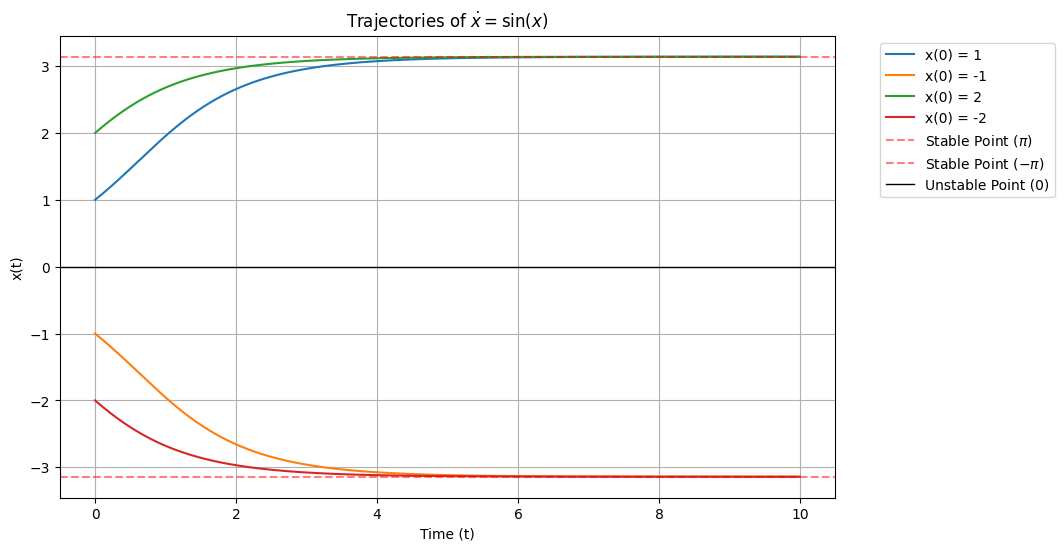

In [5]:
plt.figure(figsize=(10,6))

for x0 in initial_conditions:
    x_values = [x0]
    current_x = x0

    for _ in range(len(t) - 1):
        current_x = current_x + f(current_x)*dt
        x_values.append(current_x)

    plt.plot(t,x_values,label=f'x(0) = {x0}') 

plt.axhline(y=np.pi, color='r', linestyle='--', alpha=0.5, label=r'Stable Point ($\pi$)')
plt.axhline(y=-np.pi, color='r', linestyle='--', alpha=0.5, label=r'Stable Point ($-\pi$)')
plt.axhline(y=0, color='black', lw=1, label='Unstable Point (0)')
plt.title(r'Trajectories of $\dot{x} = \sin(x)$')
plt.xlabel('Time (t)')
plt.ylabel('x(t)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show() 

## 3. Observations and Physical Explanation

### Asymptotic Nature
As $t \to \infty$, we observe the following behavior:
* **Positive trajectories ($x_0 = 1, 2$):** Both curves converge asymptotically to $x = \pi \approx 3.1416$.
* **Negative trajectories ($x_0 = -1, -2$):** Both curves converge asymptotically to $x = -\pi \approx -3.1416$.

### Physical Interpretation
This system behaves like a particle moving in a **velocity field** defined by $\sin(x)$:
1. **Flow Direction:** Since $\dot{x} = \sin(x)$, the particle moves to the right when $\sin(x) > 0$ and to the left when $\sin(x) < 0$.
2. **Fixed Points as "Repellents" and "Attractors":** 
   * The point $x=0$ acts like a **repellent** (unstable); any particle starting near it is pushed away.
   * The points $x = \pm \pi$ act like **attractors** (stable); particles from either side are "pulled" into them until their velocity ($\dot{x}$) becomes zero.
3. **Equilibrium:** The solutions never actually "cross" $\pm \pi$ because as they get closer, the velocity $\sin(x)$ approaches zero, causing the motion to slow down and stop exactly at the stable equilibrium.